In [194]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math
%matplotlib inline

In [195]:
def parseData(fileName, startyear, endyear):
    file = np.genfromtxt(fileName, delimiter=',', names=['year', 'day', 'rainfall'], dtype=[int, int, float])
    
    tot_data = {}
    while startyear <= endyear:
        rainfall_by_year = {}
        for row in file:
            if row[0] == startyear:
                day = int(row[1])
                rainfall = float(row[2])
                rainfall_by_year[day] =  rainfall
        tot_data[int(startyear)] = rainfall_by_year
        startyear +=1
    jsondata = json.dumps(tot_data, sort_keys=True, indent=4)
    diskJson = open('rainfall_data.json', 'w+')
    diskJson.write(jsondata)
    return tot_data

In [196]:
file = parseData('python_language_1_data.csv', 1937, 2012)

In [197]:
def plotRainfallYear(jsonFile, year, colour):
    xpoints = []
    ypoints = []
    file = open(jsonFile, 'r')
    data_as_string = file.read()
    py_data_object = json.loads(data_as_string)
    rainfall_data = py_data_object[year]
    for day, rainfall in rainfall_data.items():
        xpoints.append(int(day))
        ypoints.append(float(rainfall))
    plt.plot(xpoints, ypoints, colour)
    plt.ylabel('Rainfall (mm/day)')
    plt.xlabel('Day')
    plt.title('Daily rainfall measurement in {0}'.format(year))
    plt.savefig('Rainfall_plot_1998.png')

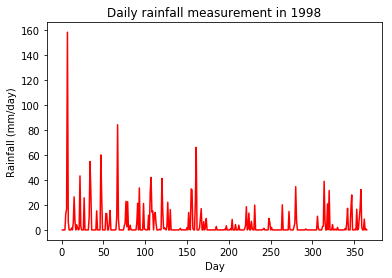

In [198]:
plotRainfallYear('rainfall_data.json', '1998', 'r')

In [199]:
def plotAnnualRainfall(jsonFile, startyear, endyear):
    istartyear = int(startyear)
    iendyear = int(endyear)
    file = open(jsonFile, 'r')
    data_as_string = file.read()
    py_data_object = json.loads(data_as_string)
    xpoints = []
    ypoints = []
    while istartyear <= iendyear:
        rainfall_data = py_data_object[str(istartyear)]
        tot_rainfall = 0
        for day, rainfall in rainfall_data.items():
            tot_rainfall += float(rainfall)
        mean_rainfall = tot_rainfall/len(rainfall_data.items())
        ypoints.append(mean_rainfall)
        xpoints.append(int(istartyear))
        istartyear+=1
    plt.plot(xpoints, ypoints, 'bo-')
    plt.ylabel('Mean Annual Rainfall (mm/day)')
    plt.xlabel('Year')
    plt.title('Mean Annual Rainfall measurements, {0} - {1}'.format(startyear, endyear))
    plt.savefig('Rainfall_plot_1998_2000.png')

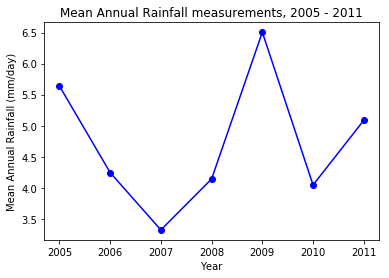

In [200]:
plotAnnualRainfall('rainfall_data.json', '2005', '2011')

In [201]:
def applyCorrection(rainfall_val):
    correct_val = rainfall_val * math.pow(1.2, np.sqrt(2))
    return correct_val

In [202]:
applyCorrection(3)

3.882401505945311

In [203]:
def applyCorrectionLoop(jsonFile, year):
    corrected_rainfall_list =[]
    file = open(jsonFile, 'r')
    data_as_string = file.read()
    py_data_object = json.loads(data_as_string)
    rainfall_data = py_data_object[year]
    for day, rainfall in rainfall_data.items():
        correct_rainfall = applyCorrection(rainfall)
        corrected_rainfall_list.append(correct_rainfall)
    return corrected_rainfall_list

In [204]:
correct_data_loop = applyCorrectionLoop('rainfall_data.json', '2000')

In [205]:
def applyCorrectionComp(jsonFile, year):
    corrected_rainfall_list =[]
    file = open(jsonFile, 'r')
    data_as_string = file.read()
    py_data_object = json.loads(data_as_string)
    rainfall_data = py_data_object[year]
    return [applyCorrection(rainfall) for day, rainfall in rainfall_data.items()]


In [206]:
correct_data_comp = applyCorrectionComp('rainfall_data.json', '2000')